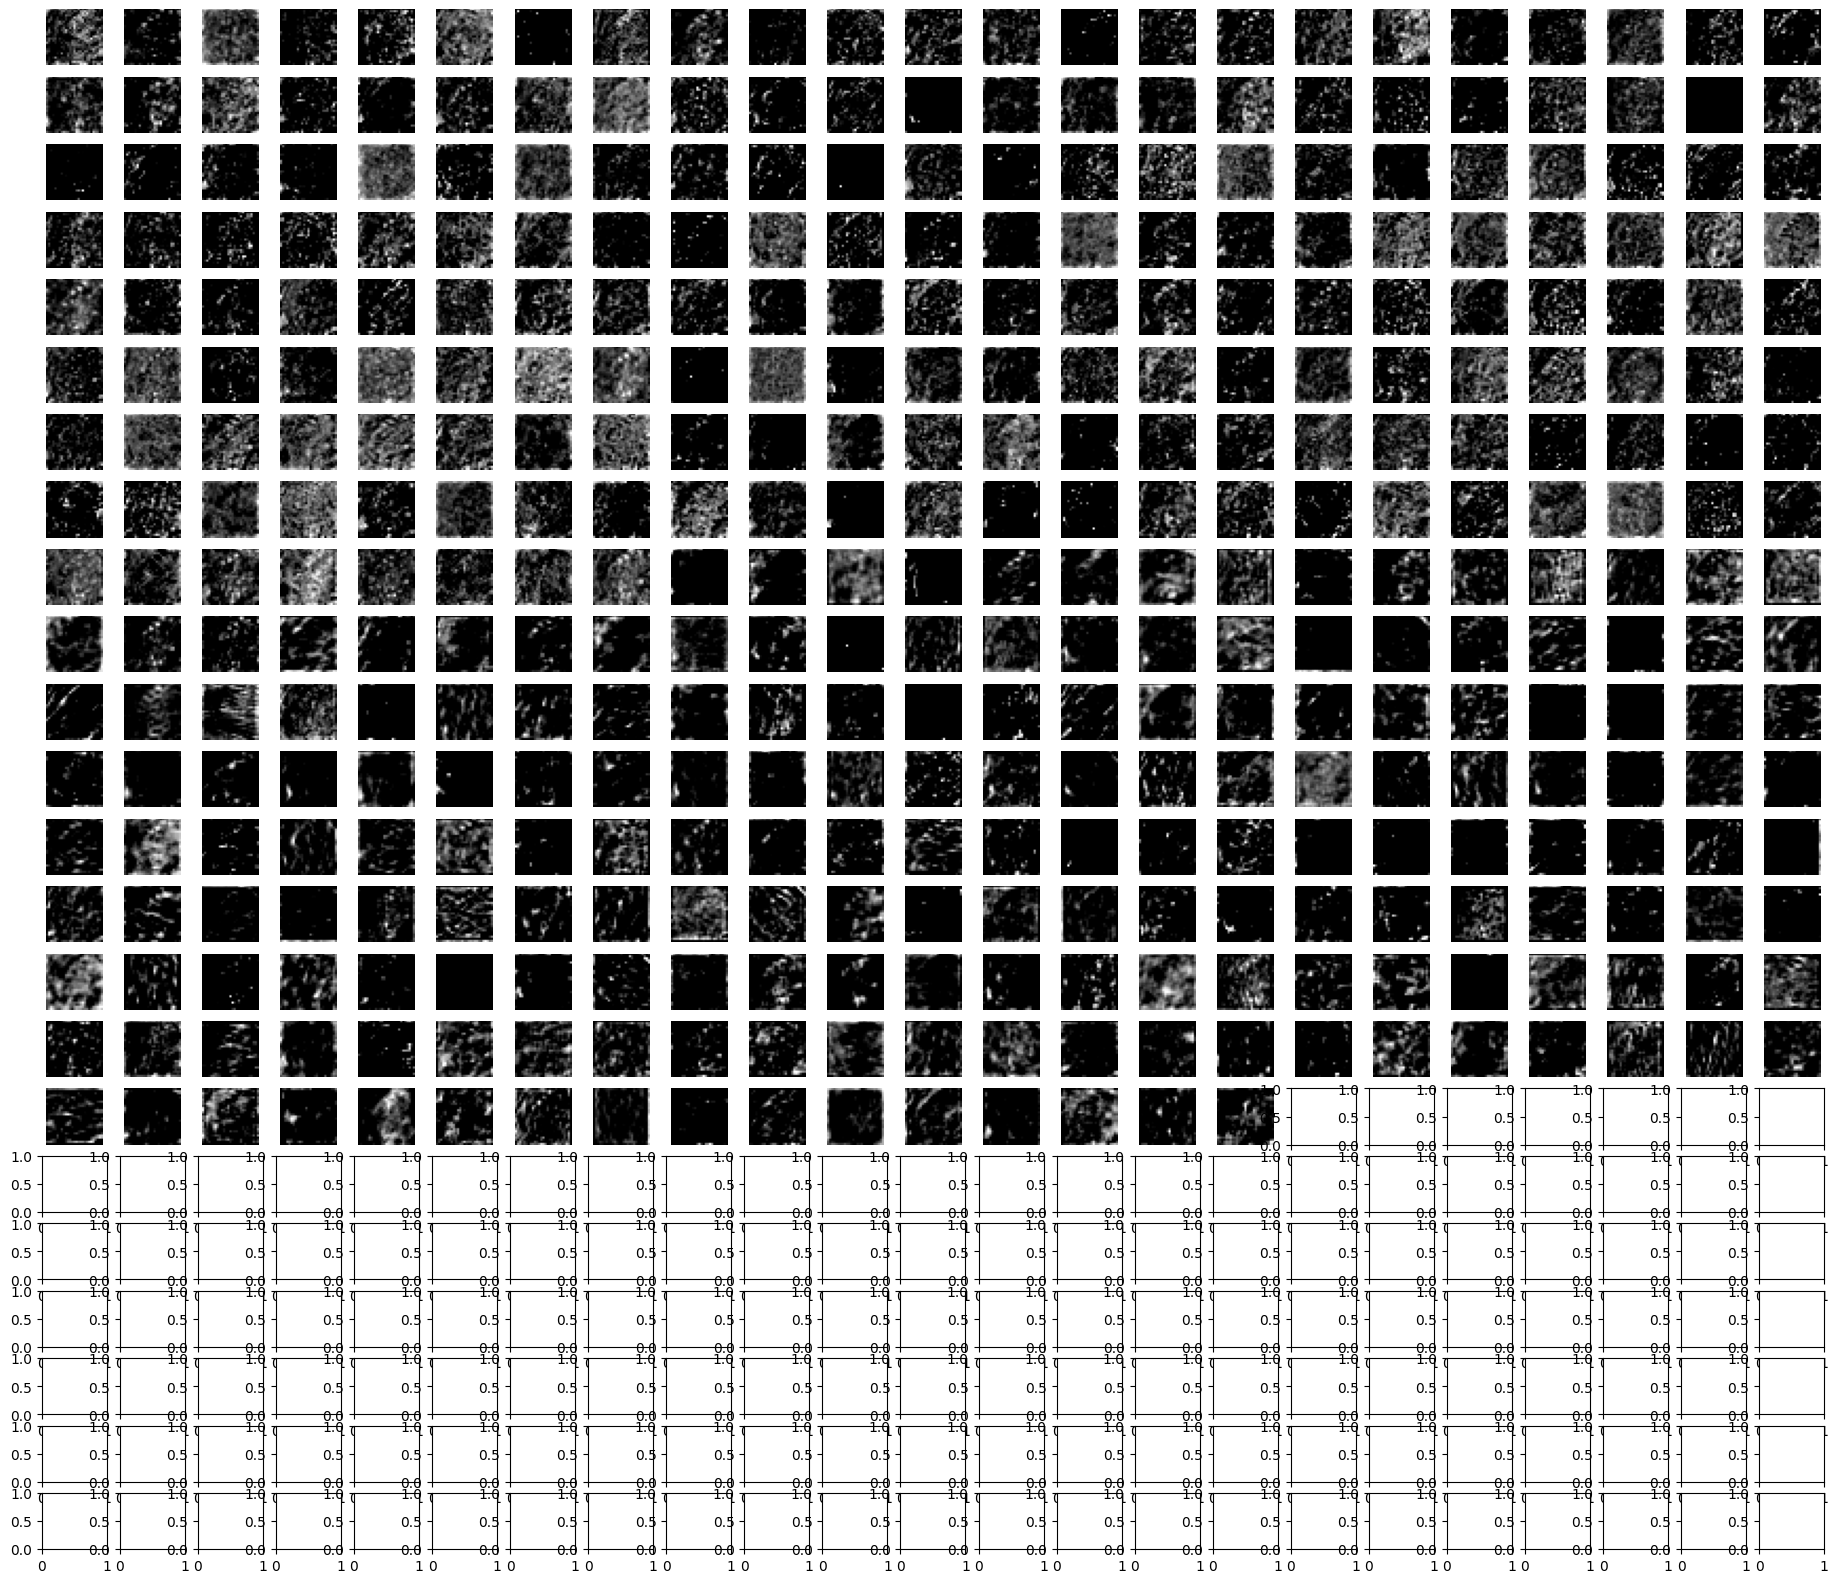

In [4]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2 as cv


class SqueezeNet1_0():
    def __init__(self, weights='ImageNet', last_layer_ind=-3):
        
        if weights == 'ImageNet':
            pretrained_model = models.squeezenet1_0(pretrained=True)
        self.block = list(pretrained_model.children())[0]
        self.layer = self.block[0:last_layer_ind]
        
    def __str__(self):
        return 'squeezenet1_0'
    
    def describe(self, image_path):
        # Requires image to be Pillow.

        # Load the image and apply the necessary transformations
        image = Image.open(image_path).convert('RGB')
        transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
        image = transform(image)
        image = image.unsqueeze(0)  # Add batch dimension

        model = nn.Sequential(*self.layer)
        model.eval()
        with torch.no_grad():
                features = model(image)

        return features.squeeze()


if __name__ == "__main__":
    image_path = "C:/Users/hadil/Documents/projects/Machine Learning/project/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/40X/SOB_B_A-14-22549AB-40-001.png"
    pretrained_model = models.squeezenet1_0(pretrained=True)

    pass

obj = SqueezeNet1_0('ImageNet', -3)
obj.describe(image_path)
features = obj.describe(image_path)

# Create a 16x32 grid of subplots (to fit all 512 features)
fig, axs = plt.subplots(nrows=23, ncols=23, figsize=(23, 20))

# Loop over the features and plot each one as an image in a subplot
for i in range(len(features)):
    row = i // 23
    col = i % 23
    axs[row, col].imshow(features[i], cmap='gray')
    axs[row, col].axis('off')

# Show the plot
plt.show()

In [5]:
print(pretrained_model)

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   